<a href="https://colab.research.google.com/github/jmacfbp13/final_project/blob/main/Final_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the Data

For this Data Set, I chose this one because I have always been greatly interested in College Basketball. From watching it, to now rooting for Illinois, understanding the stats behind what makes a team successful is something that greatly interests me!

Some questions I had simply were the basic ones: What statistics stand out to a team that is successful and can win -- is it more defensive, or offensive? Is it typically the bigger conferences usually, or just anyone that has a great run statistic wise can be successful? These basic questions I used to dive deeper into the understanding of what makes a team good enough to win. 

In [24]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import sqlite3
import matplotlib.pyplot as plt


df = pd.read_csv('https://github.com/jmacfbp13/final_project/raw/main/college_basketball.csv')
df

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,Michigan St.,B10,35,26,111.4,87.8,0.9392,50.6,44.5,20.8,19.2,36.1,27.6,36.6,32.4,50.4,44.3,34.1,30.1,64.4,6.7,S16,3.0,2013
2451,Arizona,P12,35,27,114.4,92.2,0.9229,52.5,46.6,19.5,19.8,35.0,26.7,37.4,32.9,50.6,43.4,37.1,35.8,66.8,4.6,S16,6.0,2013
2452,Oregon,P12,37,28,104.8,88.6,0.8728,49.3,46.4,21.4,22.0,35.8,27.2,38.4,33.3,49.1,44.9,33.3,33.4,69.2,2.9,S16,12.0,2013
2453,La Salle,A10,34,24,112.0,96.2,0.8516,51.9,49.3,17.1,21.3,29.0,34.2,31.3,28.5,49.3,50.6,37.7,30.2,66.0,0.3,S16,13.0,2013


In [20]:
df.shape

(2455, 24)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2455 entries, 0 to 2454
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TEAM        2455 non-null   object 
 1   CONF        2455 non-null   object 
 2   G           2455 non-null   int64  
 3   W           2455 non-null   int64  
 4   ADJOE       2455 non-null   float64
 5   ADJDE       2455 non-null   float64
 6   BARTHAG     2455 non-null   float64
 7   EFG_O       2455 non-null   float64
 8   EFG_D       2455 non-null   float64
 9   TOR         2455 non-null   float64
 10  TORD        2455 non-null   float64
 11  ORB         2455 non-null   float64
 12  DRB         2455 non-null   float64
 13  FTR         2455 non-null   float64
 14  FTRD        2455 non-null   float64
 15  2P_O        2455 non-null   float64
 16  2P_D        2455 non-null   float64
 17  3P_O        2455 non-null   float64
 18  3P_D        2455 non-null   float64
 19  ADJ_T       2455 non-null  

In [ ]:
df.groupby(['CONF'], as_index=False).agg({
    'TEAM': 'count'
})

,CONF,TEAM
0,A10,99
1,ACC,102
2,AE,63
3,ASun,60
4,Amer,67
5,B10,94
6,B12,70
7,BE,75
8,BSky,82
9,BSth,78


In [ ]:
#Question 1: Print all Champions from 2013-2019

champions = df[df['POSTSEASON'] == 'Champions']

print(champions)

              TEAM  CONF   G   W  ADJOE  ...  ADJ_T   WAB  POSTSEASON  SEED  YEAR
7             Duke   ACC  39  35  125.2  ...   66.4  10.7   Champions   1.0  2015
8         Virginia   ACC  38  35  123.0  ...   60.7  11.1   Champions   1.0  2019
9   North Carolina   ACC  39  33  121.0  ...   72.8   8.4   Champions   1.0  2017
10       Villanova    BE  40  35  123.1  ...   66.7   8.9   Champions   2.0  2016
11       Villanova    BE  40  36  128.4  ...   69.6  10.6   Champions   1.0  2018
12     Connecticut  Amer  40  32  112.5  ...   64.8   4.7   Champions   7.0  2014
13      Louisville    BE  40  35  115.9  ...   67.1   9.0   Champions   1.0  2013

[7 rows x 24 columns]


In [ ]:
#Print All Teams with a Team 2 Point Shooting Percentage Greater than 50%

df_good_shooting_percentage = df[df['2P_O'] > 50.0]
print(df_good_shooting_percentage)







                    TEAM  CONF   G   W  ...   WAB  POSTSEASON  SEED  YEAR
0         North Carolina   ACC  40  33  ...   8.6         2ND   1.0  2016
1              Wisconsin   B10  40  36  ...  11.3         2ND   1.0  2015
2               Michigan   B10  40  33  ...   6.9         2ND   3.0  2018
3             Texas Tech   B12  38  31  ...   7.0         2ND   3.0  2019
4                Gonzaga   WCC  39  37  ...   7.7         2ND   1.0  2017
...                  ...   ...  ..  ..  ...   ...         ...   ...   ...
2448              Kansas   B12  37  31  ...   7.5         S16   1.0  2013
2449            Miami FL   ACC  36  29  ...   6.3         S16   2.0  2013
2450        Michigan St.   B10  35  26  ...   6.7         S16   3.0  2013
2451             Arizona   P12  35  27  ...   4.6         S16   6.0  2013
2454  Florida Gulf Coast  ASun  35  24  ...  -4.0         S16  15.0  2013

[856 rows x 24 columns]


In [ ]:
#Question 3: Boxplot of 3-Point Shooting Percentage

fig = px.box(df, y='3P_O', title = '3 Point Shooting Percentage')
fig.show()

In [ ]:
#Question 4: Order all 2018 Tournament Teams by their Adjusted Offensive Efficiency

df_2018_teams = df.sort_values(by=['YEAR', 'ADJOE'])[['YEAR', 'ADJOE']]
print(df_2018_teams)

      YEAR  ADJOE
1756  2013   76.6
1930  2013   81.2
1911  2013   83.3
1917  2013   83.7
1908  2013   85.2
...    ...    ...
51    2019  121.3
21    2019  122.8
2436  2019  122.8
8     2019  123.0
33    2019  123.4

[2455 rows x 2 columns]


In [ ]:
#Question 5: Create a DataFrame of only Big Ten teams, and Order them by The Adjusted Defensive Rating
df_big_ten_teams = df[df['CONF'] == 'B10']
df_adj_big_ten = df_big_ten_teams.sort_values(by=['ADJDE'])
print(df_adj_big_ten)

              TEAM CONF   G   W  ADJOE  ...  ADJ_T   WAB  POSTSEASON  SEED  YEAR
2342     Wisconsin  B10  35  23  107.2  ...   61.9   4.6         R64   5.0  2013
2416      Michigan  B10  37  30  114.6  ...   65.9   9.2         S16   2.0  2019
2450  Michigan St.  B10  35  26  111.4  ...   64.4   6.7         S16   3.0  2013
2312      Ohio St.  B10  35  25  108.4  ...   65.4   4.5         R64   6.0  2014
2185     Wisconsin  B10  34  23  108.2  ...   65.0   6.3         R64   5.0  2019
...            ...  ...  ..  ..    ...  ...    ...   ...         ...   ...   ...
274       Illinois  B10  34  15  105.5  ...   69.0  -7.2         NaN   NaN  2016
275      Minnesota  B10  31   8   99.6  ...   69.4 -12.8         NaN   NaN  2016
2178       Indiana  B10  34  20  119.5  ...   67.2  -0.3         R64  10.0  2015
280        Rutgers  B10  31   6   97.5  ...   71.4 -14.0         NaN   NaN  2016
290           Iowa  B10  33  14  116.1  ...   71.4  -5.7         NaN   NaN  2018

[94 rows x 24 columns]


In [ ]:
#Question 6: Boxplot by Conference and by Shooting 2 Point Shooting Percentage

fig2 = px.box(df, y='2P_O', x='CONF', title='2 Point Shooting Percentage by Conference')
fig2.show()

In [5]:
#Question 7: Count the Number of Tournament Teams between 2013 and 2019 by Conference

df.groupby(['CONF',], as_index=False).agg({'TEAM': 'count'})

,CONF,TEAM
0,A10,99
1,ACC,102
2,AE,63
3,ASun,60
4,Amer,67
5,B10,94
6,B12,70
7,BE,75
8,BSky,82
9,BSth,78


In [16]:
#Question 8: Pull from Code the Maximum WAB from 2015

df_2015 = df[df['YEAR'] == '2015']
df_max_wab = max(df_2015['WAB'])
print(df_max_wab)

ValueError: ignored

In [17]:
#Question 9: Sort all Teams by Their Respective Team Name In Alphabetical Order, then by their Number of Wins in that Season

df_team_asc_wins_desc = df.sort_values(['TEAM', 'W'], ascending=[True, False])
display(df_team_asc_wins_desc)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
2292,Abilene Christian,Slnd,30,27,100.9,100.7,0.5064,51.9,49.8,17.3,23.3,27.0,28.5,34.0,38.3,49.5,49.8,37.7,33.3,67.1,-2.6,R64,15.0,2019
1288,Abilene Christian,Slnd,28,16,96.5,106.6,0.2423,50.4,51.4,20.3,21.6,27.3,29.7,31.5,43.2,51.9,52.3,31.8,33.2,69.8,-11.3,NaN,NaN,2018
1276,Abilene Christian,Slnd,25,13,97.5,107.5,0.2450,52.5,52.8,21.0,21.4,23.0,31.7,34.7,44.3,50.7,52.1,37.1,36.1,67.1,-12.5,NaN,NaN,2017
1264,Abilene Christian,Slnd,27,9,96.3,111.8,0.1529,50.5,54.6,19.2,19.2,24.5,27.6,40.3,46.5,48.4,54.2,36.3,36.9,68.4,-14.4,NaN,NaN,2016
1252,Abilene Christian,Slnd,28,7,90.6,111.3,0.0854,47.3,55.3,19.8,20.8,24.1,33.9,28.3,44.7,42.0,55.2,37.8,37.0,64.0,-16.8,NaN,NaN,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,Youngstown St.,Horz,30,12,103.8,111.0,0.3167,49.6,53.6,18.5,16.2,33.5,28.9,23.1,38.5,48.5,55.0,34.1,34.2,68.7,-14.0,NaN,NaN,2019
1755,Youngstown St.,Horz,29,12,107.0,108.4,0.4626,52.2,52.2,16.1,18.6,25.0,30.5,40.0,41.2,52.3,51.7,34.7,35.5,68.0,-10.3,NaN,NaN,2014
612,Youngstown St.,Horz,30,9,101.6,113.3,0.2215,49.0,53.6,15.6,15.7,22.7,33.8,29.8,32.5,45.5,54.5,37.0,34.6,73.2,-14.0,NaN,NaN,2016
603,Youngstown St.,Horz,29,8,103.4,112.0,0.2850,50.1,53.6,17.2,17.8,27.6,34.2,35.9,36.8,48.5,51.7,35.6,37.9,67.6,-14.7,NaN,NaN,2015


In [18]:
#Question 11: Pull 10 Random Lines from Dataset

df.sample(10)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
2075,Providence,BE,35,24,108.7,95.4,0.8193,48.0,49.3,16.1,20.6,30.4,30.3,37.3,28.0,48.0,49.8,32.1,32.3,69.3,3.4,R32,9.0,2016
185,New Hampshire,AE,27,5,83.7,106.1,0.0613,44.0,51.5,18.4,16.9,21.5,24.7,21.9,38.0,39.4,52.1,32.6,33.6,67.1,-20.2,NaN,NaN,2019
1194,Furman,SC,31,23,108.1,100.8,0.6911,54.9,50.1,16.5,20.6,27.0,28.6,28.2,29.9,56.8,51.4,35.3,32.0,69.7,-4.0,NaN,NaN,2018
2032,Louisiana Lafayette,SB,32,12,98.4,105.3,0.3135,48.6,48.8,19.6,20.8,29.1,35.2,35.1,43.3,46.9,47.2,34.5,34.9,70.2,-13.9,NaN,NaN,2013
1341,South Dakota,Sum,31,26,108.3,98.6,0.7458,52.1,48.4,15.7,19.9,29.4,27.1,35.7,29.7,51.9,47.1,35.0,33.7,71.7,-1.8,NaN,NaN,2018
2020,St. Francis NY,NEC,30,12,101.5,106.6,0.3617,48.4,50.8,18.2,19.8,34.3,33.9,31.6,37.8,48.0,51.3,32.8,33.2,66.5,-13.1,NaN,NaN,2013
1819,Boston College,ACC,33,16,108.6,102.0,0.6737,51.0,51.1,17.7,17.9,28.1,30.7,39.7,29.1,49.7,48.7,35.3,37.5,64.2,-5.4,NaN,NaN,2013
634,Illinois Chicago,Horz,30,16,100.5,101.3,0.4762,53.3,48.3,20.0,17.6,24.9,30.4,27.8,42.0,54.1,46.8,34.9,33.8,71.6,-10.1,NaN,NaN,2019
2028,Wofford,SC,31,12,86.5,94.9,0.2543,44.2,47.6,20.3,22.2,25.9,27.0,27.9,38.3,43.2,48.4,30.7,30.6,63.9,-13.2,NaN,NaN,2013
147,Pittsburgh,ACC,33,14,103.3,98.2,0.6421,47.9,47.7,19.6,21.3,32.1,32.8,42.3,32.9,46.9,45.8,33.1,33.6,68.7,-6.3,NaN,NaN,2019


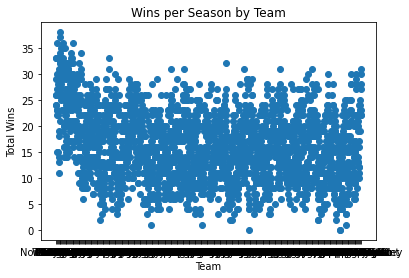

In [40]:
#Scatterplot - Team and Wins

x = df['TEAM']
y = df['W']

plt.scatter(x,y)
plt.title('Wins per Season by Team')
plt.xlabel('Team')
plt.ylabel('Total Wins')
plt.show()



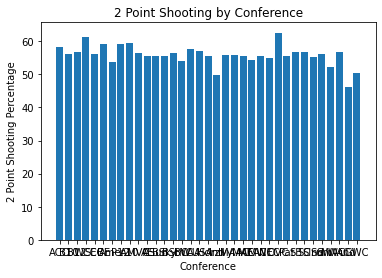

In [38]:
#Bar Graph 1

x = df['CONF']
y = df['2P_O']

plt.bar(x,y)
plt.title('2 Point Shooting by Conference')
plt.xlabel('Conference')
plt.ylabel('2 Point Shooting Percentage')
plt.show()

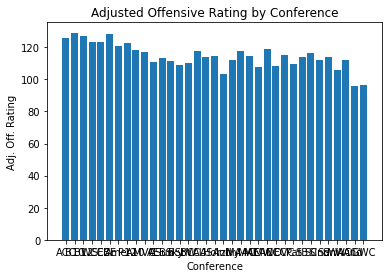

In [39]:
#Bar Graph 2

x = df['CONF']
y = df['ADJOE']

plt.bar(x, y)
plt.title('Adjusted Offensive Rating by Conference')
plt.xlabel('Conference')
plt.ylabel('Adj. Off. Rating')
plt.show()

Overall in this project, I used the skills we learned in Python to run lines of code that focused on breaking down statistics by conference. I wanted to do this because the higher level conferences, like the Big 10, ACC, and more, typically are the teams that do the best, so therefore the statistics would have had to prove that. This, mixed with my Tableau images, showed me that the so called "better teams" had a distinct advantage statistically, and thus overall had more success. 